# Face mask detection
https://medium.com/towards-artificial-intelligence/covid-19-face-mask-detection-using-deep-learning-and-opencv-9e554c380e23

## required modules

In [1]:
import tensorflow as tf
import cv2
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from datetime import datetime

## load the dataset

In [2]:
train_dataset = h5py.File('data/mask_data.h5')
X_data = np.array(train_dataset['X_data'][:])
Y_data = np.array(train_dataset['Y_data'][:])


## one-hot representation of the labels

In [3]:
Y_data = tf.keras.utils.to_categorical(Y_data, 2)

## normalize the dataset

In [4]:
X_data = X_data / 255.0

## shuffle the data

In [5]:
idx = [i for i in range(X_data.shape[0])]
idx = np.random.permutation(idx) 
X_data = X_data[idx,:]
Y_data = Y_data[idx]

print("X_data shape: ", str(X_data.shape))
print("Y_data shape: ", str(Y_data.shape))


X_data shape:  (1376, 150, 150, 1)
Y_data shape:  (1376, 2)


## split the data in train set and test set
80% train set, 20% test set

In [6]:
i = int(X_data.shape[0] * .8)
X_train = X_data[:i,:]
Y_train = Y_data[:i]
X_test = X_data[i:,:]
Y_test = Y_data[i:]

print("X_train shape: ", str(X_train.shape))
print("Y_train shape: ", str(Y_train.shape))
print("X_test shape: ", str(X_test.shape))
print("Y_test shape: ", str(Y_test.shape))

X_train shape:  (1100, 150, 150, 1)
Y_train shape:  (1100, 2)
X_test shape:  (276, 150, 150, 1)
Y_test shape:  (276, 2)


In [7]:
image_size = X_train.shape[1]

model = Sequential()
model.add(Conv2D(200,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     2000      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 200)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

## train the model

In [8]:
logdir = "logs/mask_nomask/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'models/model-{epoch:03d}.model', 
    monitor='val_loss', 
    verbose = 0, 
    save_best_only = True, 
    mode='auto')

EPOCHS = 20

history = model.fit(
    X_train,
    Y_train,
    epochs=EPOCHS,
    verbose=1, 
    validation_split=0.2,
    callbacks=[tensorboard_callback, checkpoint_callback]
    )

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 0.7521 - accuracy: 0.5977WARNING:tensorflow:From /home/maddalena/venvML/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model/assets
28/28 [==============================] - 176s 6s/step - loss: 0.7521 - accuracy: 0.5977 - val_loss: 0.6163 - val_accuracy: 0.6591
Epoch 2/20
28/28 [==============================] - 173s 6s/step - loss: 0.5430 - accuracy: 0.7341 - val_loss: 0.3865 - val_accuracy: 0.8727
Epoch 3/20
28/28 [==============================] - 175s 6s/step - loss: 0.4621 - accuracy: 0.7841 - val_loss: 0.2758 - val_accuracy: 0.8727
Epoch 4/20
28/28 [==============================] - 173s 6s/step - l

## create history dataframe

In [9]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.021381,0.995455,0.260248,0.940909,15
16,0.026193,0.993182,0.280648,0.931818,16
17,0.015681,0.996591,0.289126,0.954545,17
18,0.034695,0.987500,0.293591,0.936364,18
19,0.037566,0.982955,0.324501,0.922727,19


## plot

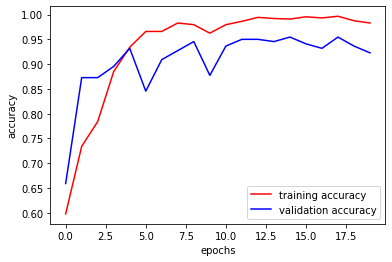

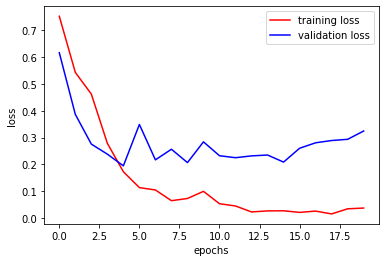

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## evaluate the model on test data

In [11]:
print(model.evaluate(X_test,Y_test))

9/9 [==============================] - 13s 1s/step - loss: 0.2405 - accuracy: 0.9384
[0.24052606523036957, 0.9384058117866516]
